<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

# Final Project 5

# Introduction

oleh

**Nindya Eka Apsari**

**M0718041**

**PYTN-KS002**

**Studi Independen - Kampus Merdeka**

## Latar Belakang

Coronavirus disease 2019 atau lebih dikenal dengan COVID-19 merupakan
penyakit yang menyerang sistem pernafasan manusia disebabkan oleh virus Severe Acute Respiratory Syndrome Coronavirus-2 (SARS-Cov-2). Penyakit COVID-19 dan pneumonia menunjukkan gejala yang mirip yakni demam, batuk, bahkan sakit kepala. Diagnosis pneumonia dapat dilakukan tes diagnostik, meliputi tes darah, rontgen dada, dan pulse oksimetri, sedangkan diagnosis COVID-19 yang direkomendasikan oleh WHO yakni dengan swab test (RT-PCR). Namun pada kenyataannya, metode swab test membutuhkan waktu yang relatif lama, yakni satu hingga tujuh hari serta biaya yang tidak murah. Untuk itu perlu adanya perkembangan yang dapat menjadi salah satu pilihan dalam diagnosis COVID-19 dan pneumonia sekaligus, terlebih kedua penyakit tersebut memiliki gejala yang
mirip. Salah satu pilihan yang dapat dilakukan yakni diagnosis menggunakan rontgen dada. Tujuan penelitian ini mendeteksi penyakit COVID-19 dan pneumonia melalui citra rontgen dada menggunakan transfer learning agar dapat menambah akurasi diagnosis penyakit dengan waktu yang lebih efisien. 

## Dataset

Penelitian ini menggunakan dataset yang bersumber dari Kaggle dengan judul [COVID-19 Radiography Database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)

Dataset ini berisikan citra rontgen dada pasien yang diambil dalam tiga kelas, yakni COVID-19, pneumonia, dan normal.
Pada masing-masing kelas diambil sebanyak 1300 citra data sehingga berjumlah 3900 citra data yang selanjutnya akan dibuat model klasifikasi deteksi penyakit COVID-19 dan pneumonia.

## Objektif yang ingin dicapai

Objektif yang ingin dicapai dalam penelitian ini yaitu:

- mendapatkan model yang baik dalam klasifikasi deteksi penyakit COVID-19 dan pneumonia melalui citra rontgen dada.
- dapat mengimplementasikan model yang diperoleh ke dalam web

# Load GPU

Dikarenakan proses analisis ini termasuk dalam deep learning, maka dibutuhkan processor tambahan yakni GPU agar proses komputasi lebih cepat dan efektif.

Hal pertama yang dilakukan yakni mengimpor dan loading GPU yang ada pada Google Colaboratory.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
6.597940746000006
GPU (s):
0.0922928630000115
GPU speedup over CPU: 71x


#Load Drive

Dikarenakan dataset yang digunakan terdapat pada Drive, maka perlu melakukan import dan loading Drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install and Load Libraries

Melakukan install dan import libraries yang digunakan dalam project ini.

In [1]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz
!pip install rarfile

     |████████████████████████████████| 992 kB 9.8 MB/s 
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=04e5a1753b98696dd90b772ebef4378f0825eed6fc1944b3ae3406cd69202a26
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from torchvision.utils import make_grid
import keras
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
import matplotlib.cm as cm
from IPython.display import Image, display
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rarfile import RarFile
from PIL import Image
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import pickle

# Data Loading

Melakukan loading dataset yang ada.

In [5]:
df = RarFile(r'/content/drive/My Drive/Colab Notebooks/Data Skripsi Fix.rar')
df.extractall('/content/data')
df.close()

Membagi dataset menjadi tiga bagian, yakni data latih, data validasi, dan data uji dengan perbandingan 8:1:1.

In [6]:
train_path = '/content/data/Data Skripsi Fix/TRAIN'
test_path = '/content/data/Data Skripsi Fix/TEST'
val_path = '/content/data/Data Skripsi Fix/VAL'

# Exploratory Data Analysis

Melakukan eksplorasi pada dataset yang ada.

Yang pertama yakni mengecek jumlah kelas yang ada.

In [7]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  3


Diperoleh terdapat 3 kelas dalam dataset.

Selanjutnya dilakukan pendefinisian untuk visualisasi sampel citra rontgen dada.

In [ ]:
def sampleImage(sampe_image_path):
  img = load_img(sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

COVID19

(299, 299, 3)


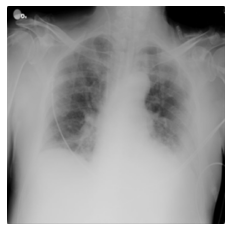

In [ ]:
sample_image_path = "/content/data/Data Skripsi Fix/TRAIN/COVID-19/COVID-1.png"
sampleImage(sample_image_path)

Citra rontgen dada di atas merupakan citra pasien COVID-19 dengan ukuran piksel 299 x 299.

NORMAL

(299, 299, 3)


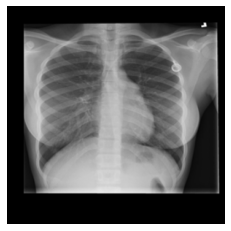

In [ ]:
sample_image_path = "/content/data/Data Skripsi Fix/TRAIN/NORMAL/Normal-1.png"
sampleImage(sample_image_path)

Citra rontgen dada di atas merupakan citra pasien normal dengan ukuran piksel 299 x 299.

PNEUMONIA

(299, 299, 3)


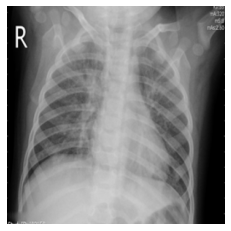

In [ ]:
sample_image_path = "/content/data/Data Skripsi Fix/TRAIN/PNEUMONIA/Viral Pneumonia-1.png"
sampleImage(sample_image_path)

Citra rontgen dada di atas merupakan citra pasien pneumonia dengan ukuran piksel 299 x 299.

Selanjutnya dilakukan pengecekan kembali informasi dataset

In [13]:
dataDir = '/content/data/Data Skripsi Fix/TRAIN/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra rontgen dada",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 3120 citra rontgen dada 3 kelas pada dataset
Nama kelas: ['PNEUMONIA', 'COVID-19', 'NORMAL']
Banyak kelas: [1040, 1040, 1040]
Dimensi citra: 299 x 299


In [14]:
dataDir = '/content/data/Data Skripsi Fix/TEST/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra rontgen dada",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 390 citra rontgen dada 3 kelas pada dataset
Nama kelas: ['PNEUMONIA', 'COVID-19', 'NORMAL']
Banyak kelas: [130, 130, 130]
Dimensi citra: 299 x 299


In [15]:
dataDir = '/content/data/Data Skripsi Fix/VAL/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra rontgen dada",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 390 citra rontgen dada 3 kelas pada dataset
Nama kelas: ['PNEUMONIA', 'COVID-19', 'NORMAL']
Banyak kelas: [130, 130, 130]
Dimensi citra: 299 x 299


Selanjutnya melihat secara random 9 citra pada semua kelas.

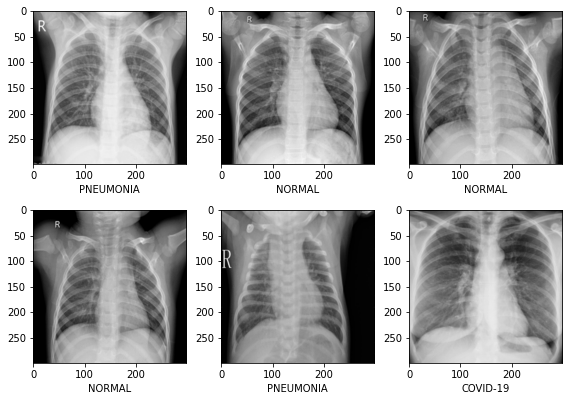

In [ ]:
plt.subplots(1,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=6)):  
    im = Image.open(imageFilesList[k])                    
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

# Data Preprocessing

Data processing pertama yang dilakukan yakni augmentasi data pada data latih, seperti zoom range, horizontal flip, dan shear range. Kemudian merubah dimensi citra menjadi 224 x 224 piksel.

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.25, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           color_mode='grayscale', 
                                           target_size=(224,224)
                                           )

Found 3120 images belonging to 3 classes.


In [ ]:
train.class_indices

{'COVID-19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

Pada data validasi juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= val_path,
                                                color_mode='grayscale', 
                                                target_size=(224,224)
                                                )

Found 390 images belonging to 3 classes.


Pada data uji juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          color_mode='grayscale', 
                                          target_size=(224,224), 
                                          shuffle= False
                                          )

Found 390 images belonging to 3 classes.


Berikut merupakan visualisasi dari augmentasi data yang dilakukan pada data latih.

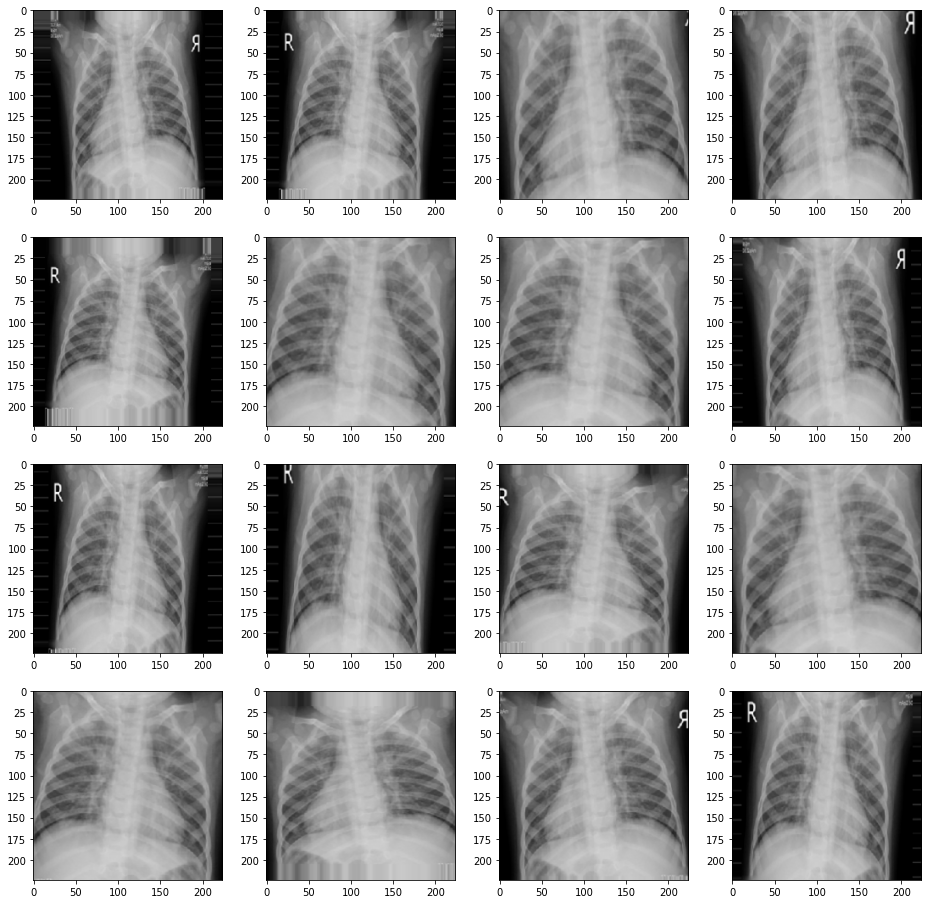

In [ ]:
image_path = "/content/data/Data Skripsi Fix/TRAIN/PNEUMONIA/Viral Pneumonia-1.png"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)



pic = train_data_gen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

In [ ]:
class_type = {0:'COVID-19',  1 : 'NORMAL', 2:'PNEUMONIA'}

In [ ]:
labels = ['COVID-19','NORMAL','PNEUMONIA']

# Model Defining

Pada penelitian ini menggunakan EfficientNet B0 sebagai pre-trained model dengan tidak mem-freeze lapisan-lapisan yang ada. Hal ini guna memperbarui parameter.

In [ ]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in efficientNet.layers:         
  layer.trainable = True

## Layers of the EfficientNet

In [ ]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

## Visualize of the EfficientNet

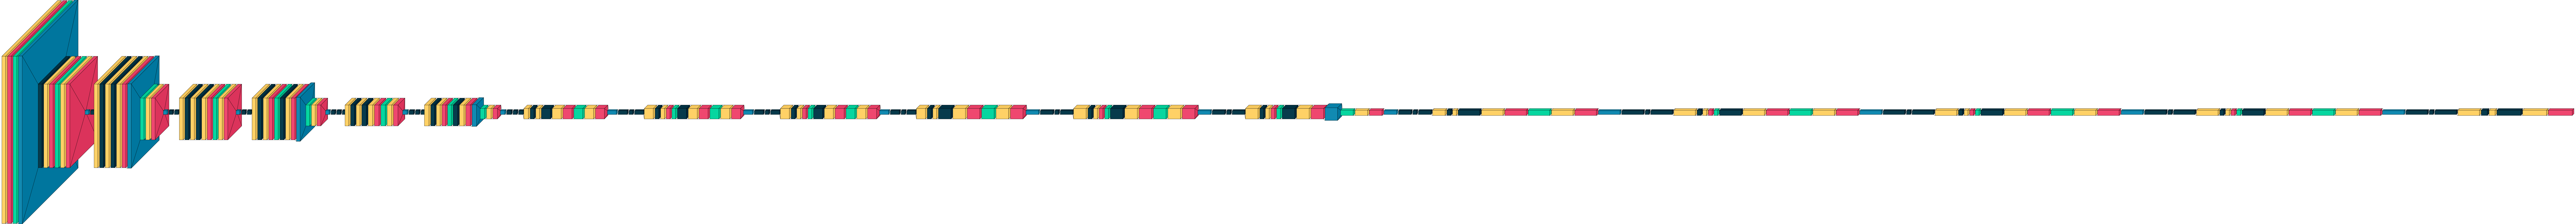

In [ ]:
visualkeras.layered_view(efficientNet)

In [ ]:
x = Flatten()(efficientNet.output)
x = tf.keras.layers.Dense(numberOfClass,activation='softmax')(x)

# creating our model.
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = x)

Layers of the Model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

## Visualize of the Model

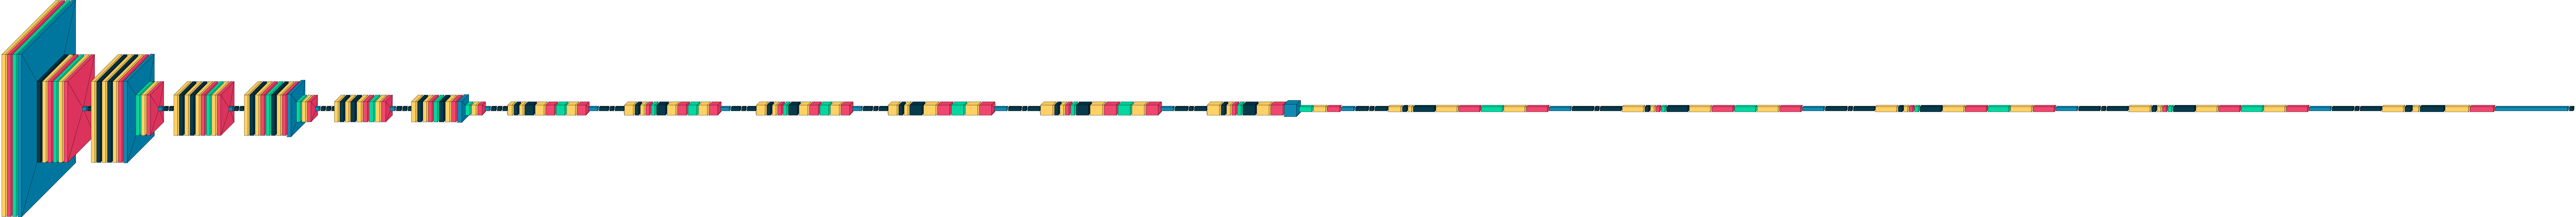

In [ ]:
visualkeras.layered_view(model)

Selanjutnya dilakukan pendefinisian model dengan optimasi Adam dan optimasi SGD. Fungsi loss yang digunakan yakni categorical crossentropy dan metrics akurasi.

## Adam Optimizer

In [ ]:
modela1 = model
opt_a1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
modela1.compile(loss='categorical_crossentropy',
              optimizer = opt_a1, 
              metrics= ['accuracy'])

In [ ]:
modela2 = model
opt_a2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
modela2.compile(loss='categorical_crossentropy',
              optimizer = opt_a2, 
              metrics= ['accuracy'])

## SGD

In [ ]:
models1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-2)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [ ]:
models2 = model
opt_s2 = tf.keras.optimizers.SGD(learning_rate=1e-3)
models2.compile(loss='categorical_crossentropy',
              optimizer = opt_s2, 
              metrics= ['accuracy'])

# Model Training

Selanjutnya dilakukan model training.

## Adam

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 15, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a1 = modela1.fit(train,
                 epochs =15, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/15
98/98 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9817
Epoch 00001: val_accuracy improved from -inf to 0.93437, saving model to Modela1_Best.h5
98/98 [==============================] - 59s 602ms/step - loss: 0.0736 - accuracy: 0.9817 - val_loss: 1.1796 - val_accuracy: 0.9344
Epoch 2/15
98/98 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9849
Epoch 00002: val_accuracy did not improve from 0.93437
98/98 [==============================] - 58s 589ms/step - loss: 0.1355 - accuracy: 0.9849 - val_loss: 0.5172 - val_accuracy: 0.9344
Epoch 3/15
98/98 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9894
Epoch 00003: val_accuracy improved from 0.93437 to 0.95312, saving model to Modela1_Best.h5
98/98 [==============================] - 58s 593ms/step - loss: 0.0928 - accuracy: 0.9894 - val_loss: 0.2928 - val_accuracy: 0.9531
Epoch 4/15
98/98 [==============================] - ETA: 0s - loss: 0.0807 - accuracy:

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a2 = modela2.fit(train,
                 epochs =15, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/15
98/98 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9788
Epoch 00001: val_accuracy improved from -inf to 0.97188, saving model to Modela2_Best.h5
98/98 [==============================] - 59s 595ms/step - loss: 0.1142 - accuracy: 0.9788 - val_loss: 1.6551 - val_accuracy: 0.9719
Epoch 2/15
98/98 [==============================] - ETA: 0s - loss: 0.1509 - accuracy: 0.9740
Epoch 00002: val_accuracy did not improve from 0.97188
98/98 [==============================] - 58s 587ms/step - loss: 0.1509 - accuracy: 0.9740 - val_loss: 0.3882 - val_accuracy: 0.9625
Epoch 3/15
98/98 [==============================] - ETA: 0s - loss: 0.1857 - accuracy: 0.9760
Epoch 00003: val_accuracy did not improve from 0.97188
98/98 [==============================] - 57s 585ms/step - loss: 0.1857 - accuracy: 0.9760 - val_loss: 0.7669 - val_accuracy: 0.9656
Epoch 4/15
98/98 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.9737
Epoch 00004: val_accuracy did

## SGD

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s1 = models1.fit(train,
                 epochs =15, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/15
98/98 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9625
Epoch 00001: val_accuracy improved from -inf to 0.95938, saving model to Models1_Best.h5
98/98 [==============================] - 62s 631ms/step - loss: 0.1995 - accuracy: 0.9625 - val_loss: 0.4072 - val_accuracy: 0.9594
Epoch 2/15
98/98 [==============================] - ETA: 0s - loss: 0.2427 - accuracy: 0.9564
Epoch 00002: val_accuracy did not improve from 0.95938
98/98 [==============================] - 58s 589ms/step - loss: 0.2427 - accuracy: 0.9564 - val_loss: 2.0130 - val_accuracy: 0.8062
Epoch 3/15
98/98 [==============================] - ETA: 0s - loss: 0.2246 - accuracy: 0.9628
Epoch 00003: val_accuracy did not improve from 0.95938
98/98 [==============================] - 58s 591ms/step - loss: 0.2246 - accuracy: 0.9628 - val_loss: 0.3420 - val_accuracy: 0.9594
Epoch 4/15
98/98 [==============================] - ETA: 0s - loss: 0.4847 - accuracy: 0.9660
Epoch 00004: val_accuracy did

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =15, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/15
98/98 [==============================] - ETA: 0s - loss: 0.5799 - accuracy: 0.9513
Epoch 00001: val_accuracy improved from -inf to 0.95000, saving model to Models2_Best.h5
98/98 [==============================] - 61s 619ms/step - loss: 0.5799 - accuracy: 0.9513 - val_loss: 0.6760 - val_accuracy: 0.9500
Epoch 2/15
98/98 [==============================] - ETA: 0s - loss: 0.6384 - accuracy: 0.9417
Epoch 00002: val_accuracy did not improve from 0.95000
98/98 [==============================] - 58s 594ms/step - loss: 0.6384 - accuracy: 0.9417 - val_loss: 3.7734 - val_accuracy: 0.8250
Epoch 3/15
98/98 [==============================] - ETA: 0s - loss: 0.8211 - accuracy: 0.9446
Epoch 00003: val_accuracy did not improve from 0.95000
98/98 [==============================] - 59s 600ms/step - loss: 0.8211 - accuracy: 0.9446 - val_loss: 3.6444 - val_accuracy: 0.9250
Epoch 4/15
98/98 [==============================] - ETA: 0s - loss: 0.5874 - accuracy: 0.9439
Epoch 00004: val_accuracy did

# Visualize of the Graph

Dari hasil model training, kemudian dilakukan visualisasi dengan grafik terhadap hasil validasi loss dan validasi accuracy pada masing-masing model.

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


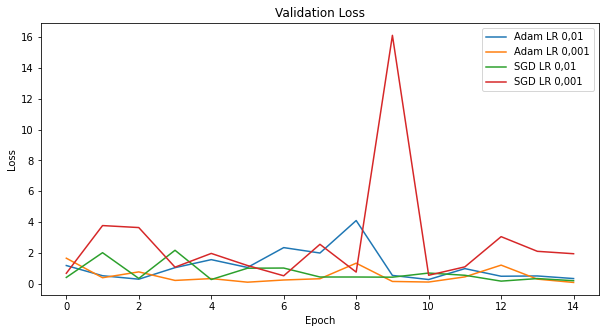

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_loss"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_loss"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_loss"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_loss"],label = "SGD LR 0,001")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

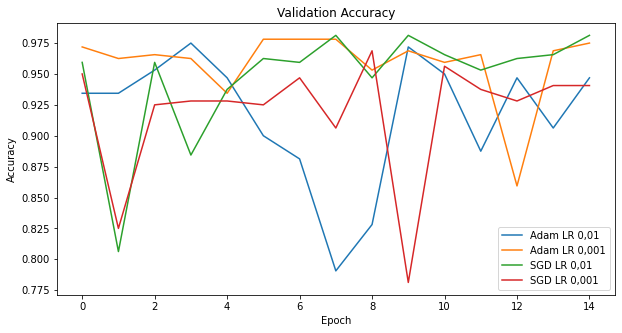

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_accuracy"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_accuracy"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_accuracy"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_accuracy"],label = "SGD LR 0,001")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adam

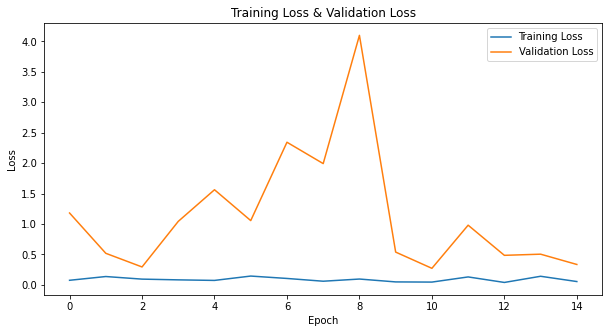

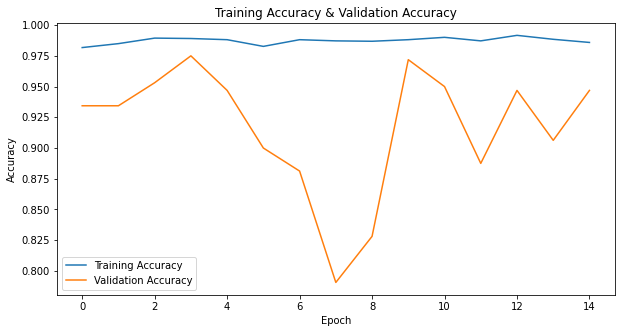

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["loss"],label = "Training Loss")
plt.plot(hist_a1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

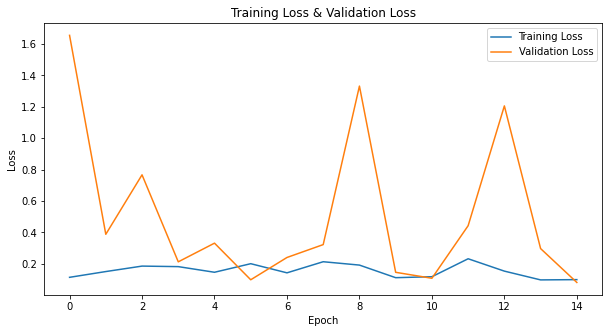

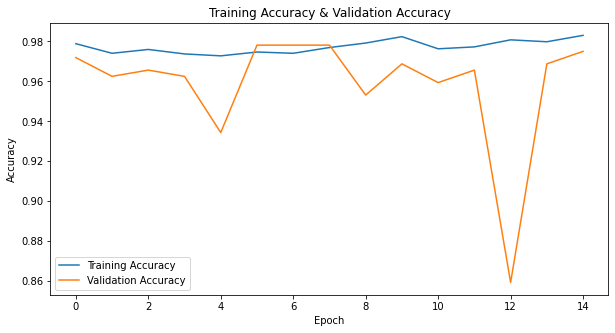

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["loss"],label = "Training Loss")
plt.plot(hist_a2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## SGD

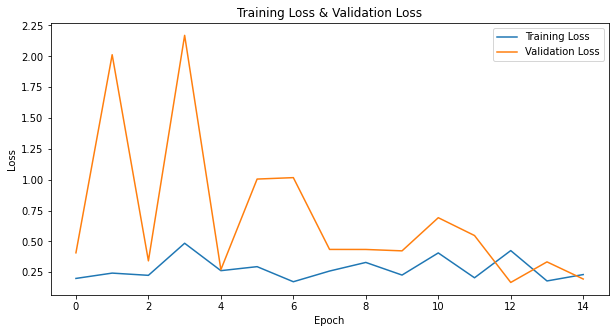

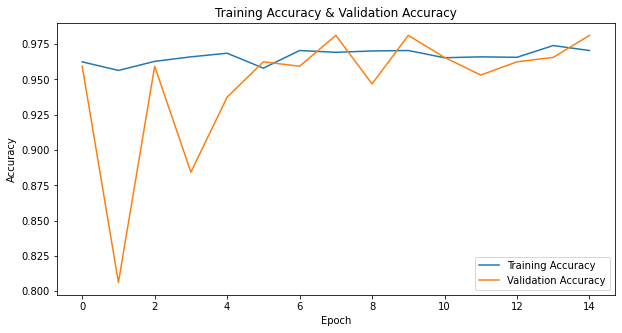

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["loss"],label = "Training Loss")
plt.plot(hist_s1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

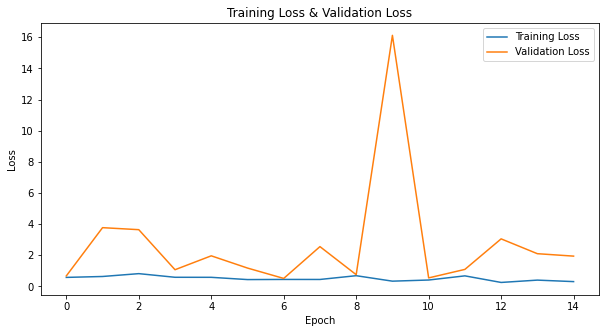

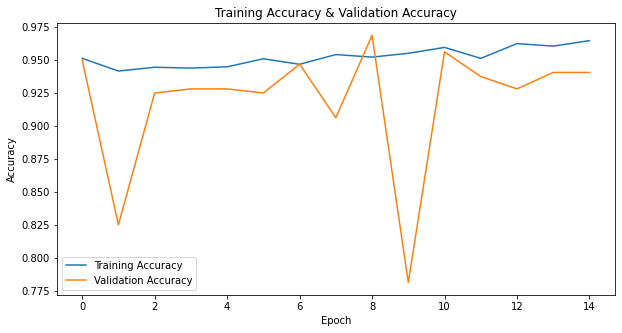

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["loss"],label = "Training Loss")
plt.plot(hist_s2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Best Model

Diperoleh model yang sangat baik yaitu EfficientNet B0 dengan Adam optimizer dan learning rate 0,001. Kemudian load model untuk dilakukan evaluasi model.

In [ ]:
modelf = load_model("Modela2_Best.h5")

In [ ]:
modelf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

# Model Evaluation

Selanjutnya melakukan evaluasi model menggunakan data uji.

In [ ]:
predictions = modelf.predict_generator(test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test.classes
class_labels = list(test.class_indices.keys()) 

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

    COVID-19       0.92      0.98      0.95       130
      NORMAL       0.89      0.97      0.93       130
   PNEUMONIA       0.95      0.80      0.87       130

    accuracy                           0.92       390
   macro avg       0.92      0.92      0.91       390
weighted avg       0.92      0.92      0.91       390



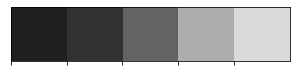

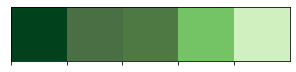

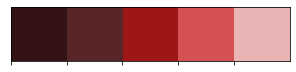

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[126   0   4]
 [  2 123   5]
 [ 10  17 103]]


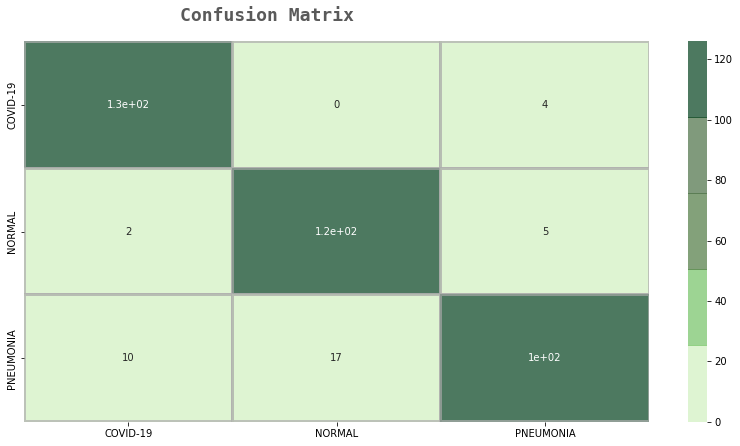

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(true_classes, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(true_classes, predicted_classes))
plt.show()

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

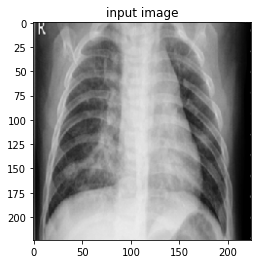

The given X-Ray image is of type = PNEUMONIA

The chances of image being Covid is : 1.0127049421271295e-05 percent

The chances of image being Normal is : 1.7887162861995876e-07 percent

The chances of image being Pneumonia is : 99.99998807907104 percent


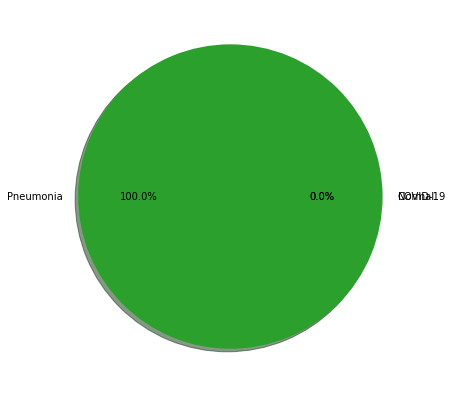

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/data/Data Skripsi Fix/TEST/PNEUMONIA/Viral Pneumonia-1046.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

res = labels[np.argmax(modelf.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {modelf.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {modelf.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Pneumonia is : {modelf.predict(img)[0][2]*100} percent")

label = ['COVID-19', 'Normal', 'Pneumonia']
a = modelf.predict(img)[0][0]*100
b = modelf.predict(img)[0][1]*100
c = modelf.predict(img)[0][2]*100
data = [a, b,c]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title("Probabilitas Klasifikasi")
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(data, labels = label, autopct='%1.1f%%', shadow=True)
plt.show()

# Save Model

Selanjutnya menyimpan model yang dipilih untuk selanjutnya dilakukan deployment web Heroku.

In [ ]:
model.save("model_c2.h5")

# Grad Cam Viz

Dilakukan juga visualisasi Gradient-weighted Class Activation Mapping untuk melihat bagaimana layer terakhir melihat citra dalam klasifikasi.

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [ ]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "top_conv", model = modelf):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")
  print(f"The chances of image being Pneumonia is : {model.predict(img)[0][2]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

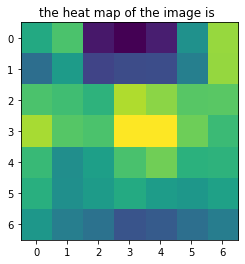


The given X-Ray image is of type = NORMAL

The chances of image being Covid is : 2.5643925871676743e-08 %
The chances of image being Normal is : 100.0 %
The chances of image being Pneumonia is : 3.952270333229535e-06 %

image with heatmap representing region on interest


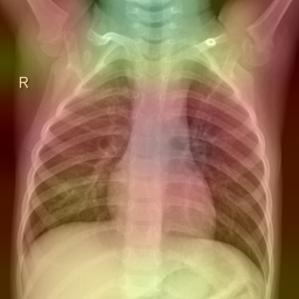


the original input image



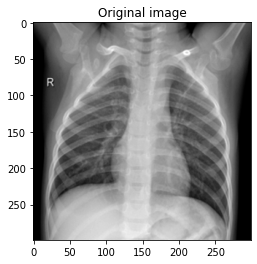

In [ ]:
path = "/content/data/Data Skripsi Fix/TEST/NORMAL/Normal-1048.png"

image_prediction_and_visualization(path)

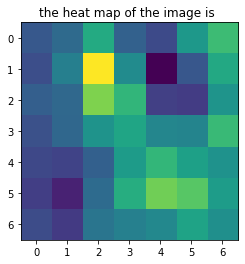


The given X-Ray image is of type = PNEUMONIA

The chances of image being Covid is : 0.0010053692676592618 %
The chances of image being Normal is : 0.006658575148321688 %
The chances of image being Pneumonia is : 99.99233484268188 %

image with heatmap representing region on interest


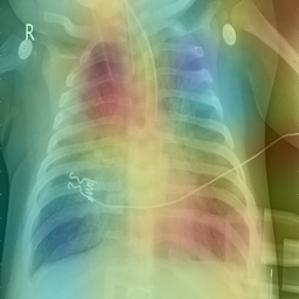


the original input image



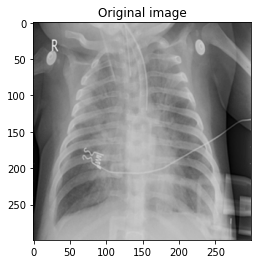

In [ ]:
path = "/content/data/Data Skripsi Fix/TEST/PNEUMONIA/Viral Pneumonia-1052.png"

image_prediction_and_visualization(path)

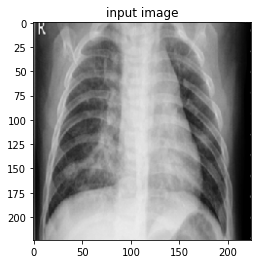

The given X-Ray image is of type = PNEUMONIA

The chances of image being Covid is : 1.0127049421271295e-05 percent

The chances of image being Normal is : 1.7887162861995876e-07 percent

The chances of image being Pneumonia is : 99.99998807907104 percent


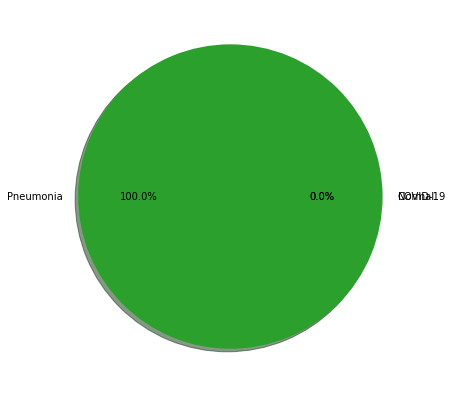

In [ ]:
path = "/content/data/Data Skripsi Fix/TEST/PNEUMONIA/Viral Pneumonia-1046.png"      

img = get_img_array(path)


plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

res = labels[np.argmax(modelf.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {modelf.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {modelf.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Pneumonia is : {modelf.predict(img)[0][2]*100} percent")

label = ['COVID-19', 'Normal', 'Pneumonia']
a = modelf.predict(img)[0][0]*100
b = modelf.predict(img)[0][1]*100
c = modelf.predict(img)[0][2]*100
data = [a, b,c]
 

fig = plt.figure(figsize =(10, 7))
plt.title("Probabilitas Klasifikasi")
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(data, labels = label, autopct='%1.1f%%', shadow=True)
plt.show()

# Conclusions

Berdasarkan analisis yang telah dilakuakn, diperoleh kesimpulan sebagai berikut:

- Dari keempat model yang diuji, dipilih Model EfficientNet B0 dengan Adam optimizer dan learning rate 0,001 untuk dilakukan deployment berdasarkan validasi loss dan validasi accuracy.
- Diperoleh evaluasi model yakni akurasi, presisi, recall, dan F1-score sebesar 92% yang berarti model sangat baik dalam mengklasifikasi citra.
- Selanjutnya dilakukan deployment dengan Flask dan Heroku yang link deployment dapat diakses https://skripsi-fp5-efficientnet.herokuapp.com/